In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.cm as cm
    
import sys  
sys.path.insert(0, '../src/')

import jsm_halopull
import jsm_prephalo
import jsm_stats
import galhalo

## playing with delta

In [4]:
massmat = jsm_prephalo.MassMat("../../data/3000_12_8/acc_surv_mass.npy", phimin=-4) # plotting several different mass functions

massmat.prep_data(includenan=False)

massmat.SHMF()

In [5]:
massmat.lgMs = galhalo.lgMs_RP17(massmat.lgMh)
stat = jsm_stats.SatStats(massmat.lgMs)

stat.SAGA_break(Nsamp=100)

stat.satfreq(6.5)
real1 = stat.satfreq_PDF_ave # just to smooth
stat.maxsatmass()
real2 = stat.maxsatmass_PDF_ave # just to smooth
stat.CSMF()
real3 = np.average(stat.quant_split,axis=0)

dividing your sample into 31 sets 29 were discarded
dividing your sample into 30 sets


/Users/jsmonzon/Research/SatGen/notebooks/../src/galhalo.py:243: RuntimeWarning: overflow encountered in exp
  return delta*(np.log10(1.+np.exp(x)))**gamma/(1.+np.exp(10**(-x)))-\


In [6]:
delta_pix = 25
delta = np.linspace(-0.2, 1, delta_pix)
PDF_mat1 = np.zeros(shape=(delta_pix, 17))
PDF_mat2 = np.zeros(shape=(delta_pix, 17))
CSMF_mat = np.zeros(shape=(delta_pix, 45))

for i in range(delta_pix):

    massmat.SHMR(alpha=1.85, delta=delta[i], sigma=0)
    stat = jsm_stats.SatStats(massmat.lgMs)
    stat.SAGA_break(Nsamp=100)
    stat.satfreq(6.5)
    stat.maxsatmass()
    stat.CSMF()
    PDF_mat1[i] = stat.satfreq_PDF_ave # just to smooth
    PDF_mat2[i] = stat.maxsatmass_PDF_ave # just to smooth
    CSMF_mat[i] = np.average(stat.quant_split,axis=0)[1]

/Users/jsmonzon/Research/SatGen/notebooks/../src/jsm_stats.py:17: RuntimeWarning: invalid value encountered in divide
  return count / sum(count)
/Users/jsmonzon/Research/SatGen/notebooks/../src/jsm_stats.py:22: RuntimeWarning: invalid value encountered in divide
  pdf = count / sum(count)


dividing your sample into 31 sets 29 were discarded
dividing your sample into 30 sets
dividing your sample into 31 sets 29 were discarded
dividing your sample into 30 sets
dividing your sample into 31 sets 29 were discarded
dividing your sample into 30 sets
dividing your sample into 31 sets 29 were discarded
dividing your sample into 30 sets
dividing your sample into 31 sets 29 were discarded
dividing your sample into 30 sets
dividing your sample into 31 sets 29 were discarded
dividing your sample into 30 sets
dividing your sample into 31 sets 29 were discarded
dividing your sample into 30 sets
dividing your sample into 31 sets 29 were discarded
dividing your sample into 30 sets
dividing your sample into 31 sets 29 were discarded
dividing your sample into 30 sets
dividing your sample into 31 sets 29 were discarded
dividing your sample into 30 sets
dividing your sample into 31 sets 29 were discarded
dividing your sample into 30 sets
dividing your sample into 31 sets 29 were discarded
di

In [7]:
norm = mpl.colors.Normalize(vmin=delta.min(), vmax=delta.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.viridis)

colors = mpl.cm.viridis(np.linspace(0, 1, delta_pix))

assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR


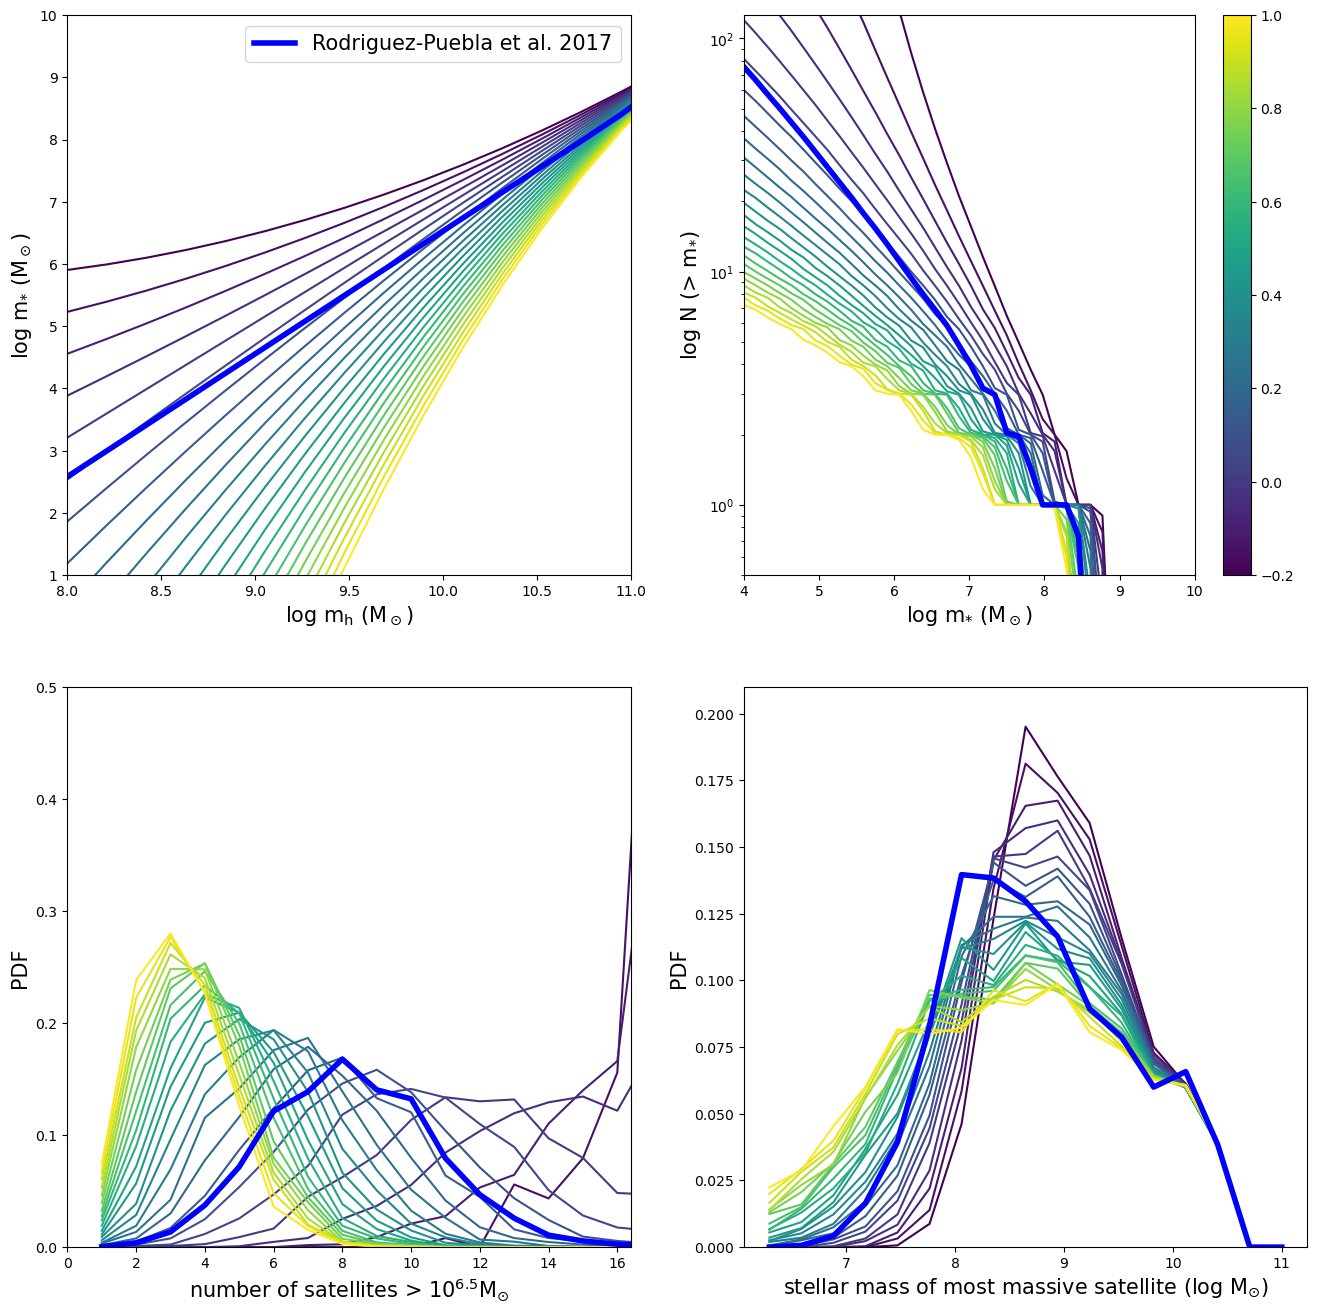

In [9]:
x1 = np.linspace(0,17,18)
x2 = np.linspace(6,11,18)
halo_masses = np.linspace(8,12,20)

fig, axs = plt.subplots(2, 2, figsize=(16,16))

for i in range(delta_pix):
    axs[0,0].plot(halo_masses, galhalo.master_SHMR_1D(halo_masses, delta=delta[i]), color=colors[i])
    axs[0,1].plot(stat.mass_bins, CSMF_mat[i], color=colors[i])
    axs[1,0].plot(x1[1:], PDF_mat1[i], color=colors[i])
    axs[1,1].plot(x2[1:], PDF_mat2[i], color=colors[i])

axs[0,0].plot(halo_masses, galhalo.lgMs_RP17(halo_masses), lw=4, color="blue", label="Rodriguez-Puebla et al. 2017")
axs[0,0].set_ylabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
axs[0,0].set_xlabel("log m$_{\mathrm{h}}$ (M$_\odot$)", fontsize=15)
axs[0,0].legend(fontsize=15)
axs[0,0].set_xlim(8,11)
axs[0,0].set_ylim(1,10)

axs[0,1].plot(stat.mass_bins, real3[1],  lw=4, color="blue")
axs[0,1].set_ylabel("log N (> m$_{*}$)", fontsize=15)
axs[0,1].set_xlabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
axs[0,1].set_yscale("log")
axs[0,1].set_ylim(0.5, 10**2.1)
axs[0,1].set_xlim(4, 10)
cb = fig.colorbar(cmap, ax=axs[0,1])


axs[1,0].plot(x1[1:], real1, lw=4, color="blue")
axs[1,0].set_xlabel("number of satellites > $10^{6.5} \mathrm{M_{\odot}}$", fontsize=15)
axs[1,0].set_ylabel("PDF", fontsize=15)
axs[1,0].set_xlim(0,16.4)
axs[1,0].set_ylim(0,.5)


axs[1,1].plot(x2[1:], real2, lw=4, color="blue")
axs[1,1].set_xlabel("stellar mass of most massive satellite ($\mathrm{log\ M_{\odot}}$)", fontsize=15)
axs[1,1].set_ylabel("PDF", fontsize=15)
axs[1,1].set_ylim(0,.21)
plt.show()